By: Daniel Shackelford

Exploratory EDA

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')
import string
import glob
from scipy import stats

Import Data from all csv files and concatenate all of the files into one dataframe for later use:

In [3]:
path = r'..\..\dataset\archive'
all_files = glob.glob(path+ "/*.csv")

li =[]

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

trend_videos = pd.concat(li, axis=0, ignore_index=True)


Brief overview of the dataframe and data types. The total row count for the dataframe is 499873

In [4]:
trend_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499874 entries, 0 to 499873
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           499874 non-null  object
 1   title              499874 non-null  object
 2   publishedAt        499874 non-null  object
 3   channelId          499874 non-null  object
 4   channelTitle       499873 non-null  object
 5   categoryId         499874 non-null  int64 
 6   trending_date      499874 non-null  object
 7   tags               499874 non-null  object
 8   view_count         499874 non-null  int64 
 9   likes              499874 non-null  int64 
 10  dislikes           499874 non-null  int64 
 11  comment_count      499874 non-null  int64 
 12  thumbnail_link     499874 non-null  object
 13  comments_disabled  499874 non-null  bool  
 14  ratings_disabled   499874 non-null  bool  
 15  description        493768 non-null  object
dtypes: bool(2), int64(5)

Short description of the data to get a better idea of our feature set.

In [5]:
trend_videos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...


There are a total of 6106 null values in the dataset. All null values are in the description column. We will insert a place holder value into each one and then further look into our data attributes:

In [6]:
trend_videos.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            1
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          6106
dtype: int64

In [7]:
# there are empty descriptions in the data set...
trend_videos["description"] = trend_videos["description"].fillna(value="Video has no description")

In [8]:
# numerical columns...
trend_videos.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,499874.00,499874.00,499874.00,499874.00,499874.00
mean,19.16,1977152.47,118476.23,2994.52,12231.54
std,6.76,5996266.65,414437.02,52657.96,110248.79
min,1.00,0.00,0.00,0.00,0.00
25%,17.00,252727.50,9571.25,191.00,694.00
50%,22.00,637740.50,28969.00,536.00,2003.00
75%,24.00,1626219.25,89087.00,1676.00,6002.00
max,29.00,264407389.00,16254784.00,12341474.00,6738572.00


In [9]:
# non-numerical columns...
trend_videos.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,499874,499874,499874,499874,499873,499874,499874,499874,499874
unique,77924,79760,74122,16788,17083,280,58601,77928,77314
top,pvPsJFRGleA,Starlink Mission,2021-05-14T04:00:16Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,2021-03-02T00:00:00Z,[None],https://i.ytimg.com/vi/pvPsJFRGleA/default.jpg,Video has no description
freq,77,287,121,1295,1295,3598,63543,77,6106


In [10]:
#ratio of videos published by year
trend_videos["publishedAt"].apply(lambda x: x[:4]).value_counts(normalize=True)

2020   0.50
2021   0.50
Name: publishedAt, dtype: float64

In [11]:
# Ratio of videos with comments disabled and enabled
trend_videos["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

In [12]:
# Ratio of videos with ratings disabled and enabled
trend_videos["ratings_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: ratings_disabled, dtype: float64

Create an initial correlation heatmap to give us an initial understanding of how the categories are related:

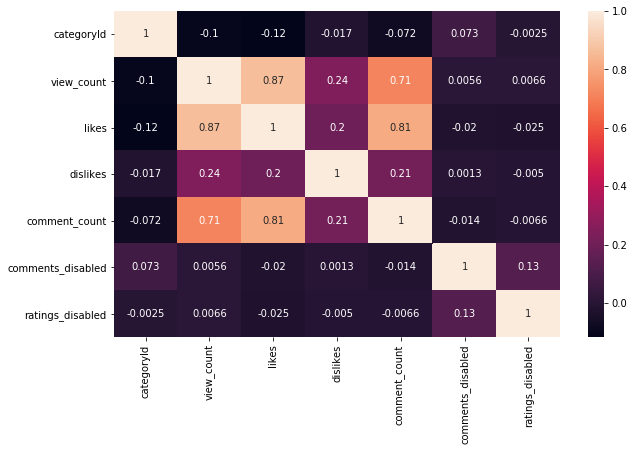

In [13]:
figure = plt.subplots(figsize=(10,6))
corr_map = sns.heatmap(trend_videos.corr(), annot=True)

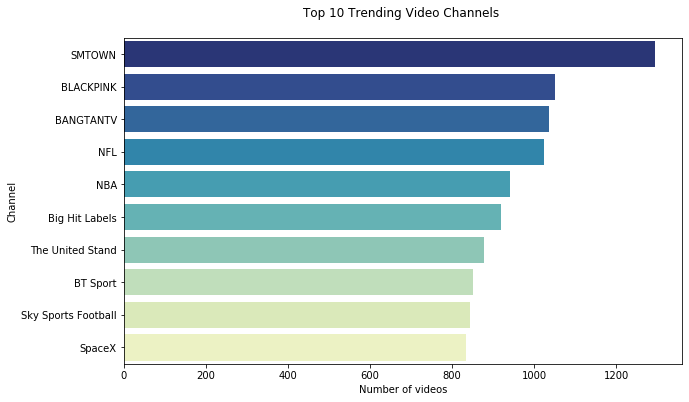

In [14]:
# Top 10 Channels having highest trending videos

videos_by_channel = trend_videos.groupby("channelTitle").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbc_plot = sns.barplot(x="no_of_videos", y="channelTitle", data=videos_by_channel, palette="YlGnBu_r")
vbc_plot = ax.set(xlabel="Number of videos", ylabel="Channel")
plt.title("Top 10 Trending Video Channels \n")
plt.show()

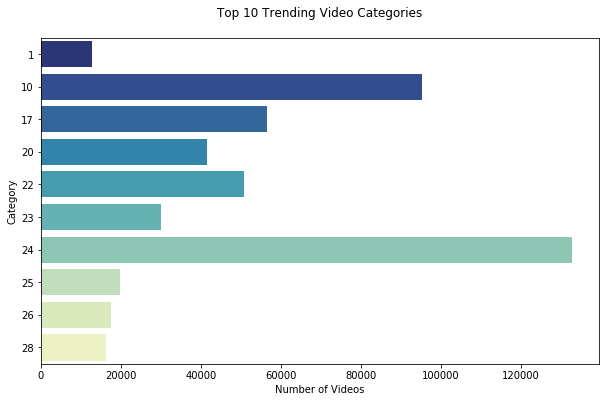

In [15]:
# Top 10 Categories having highest trending videos

videos_by_category = trend_videos.groupby("categoryId").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbcat_plot = sns.barplot(x="no_of_videos", y="categoryId", data=videos_by_category, palette="YlGnBu_r", orient = 'h')
vbcat_plot = ax.set(xlabel="Number of Videos", ylabel="Category")
plt.title("Top 10 Trending Video Categories\n")
plt.show()

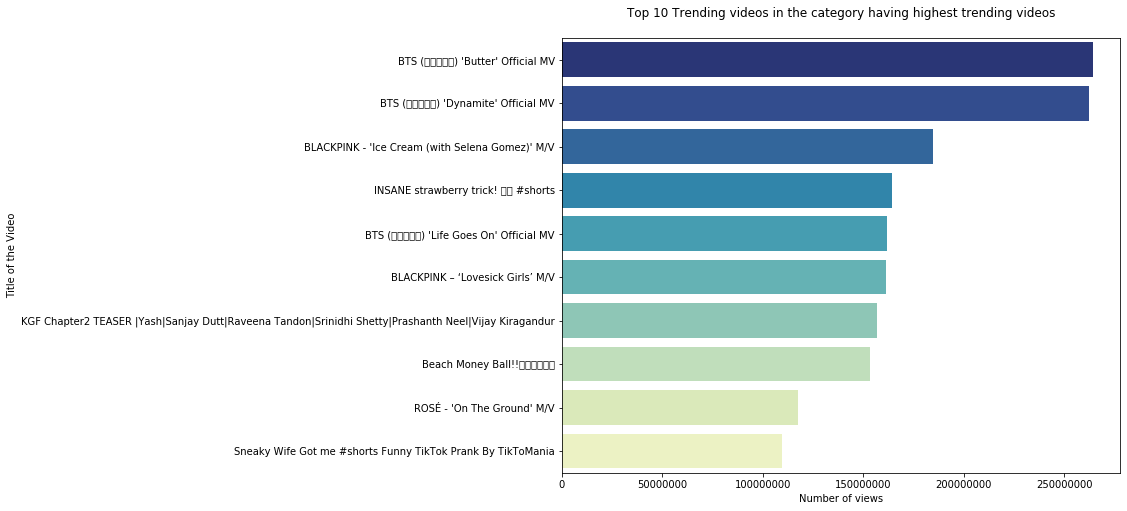

In [16]:
# top 10 videos
# From the previous plot, it seems that category 10 hosted the highest number of trending videos
category10_videos = trend_videos[["title","view_count"]].sort_values(by="view_count",ascending=False).drop_duplicates("title",keep="first")
category10_top10 = category10_videos.nlargest(10, ["view_count"])

fig, ax = plt.subplots(figsize=(10,8))
top10_plot = sns.barplot(data=category10_top10, x='view_count', y='title', palette="YlGnBu_r", ax=ax, ci=None)
top10_plot = ax.set(xlabel="Number of views", ylabel="Title of the Video")
plt.ticklabel_format(axis="x", style="plain")
plt.title("Top 10 Trending videos in the category having highest trending videos\n")
plt.show()

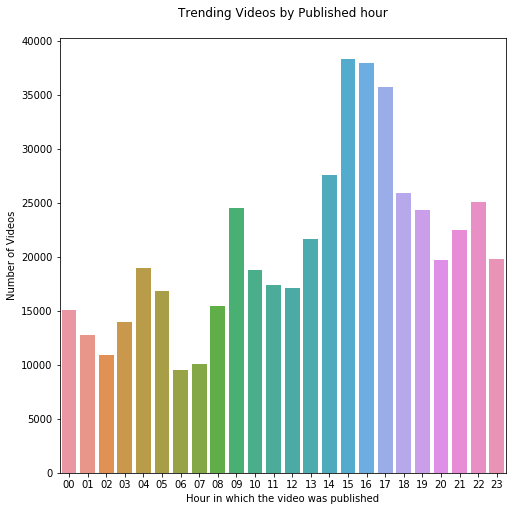

In [17]:
# video publishing hour impact on trending videos
# extract published hour from the publishedAt 
trend_videos["publish_hour"] = trend_videos["publishedAt"].apply(lambda x: x[11:13])

# plot no of videos published by hour 
videos_by_pub_hour = trend_videos.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(8,8))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour)
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour\n")
plt.show()

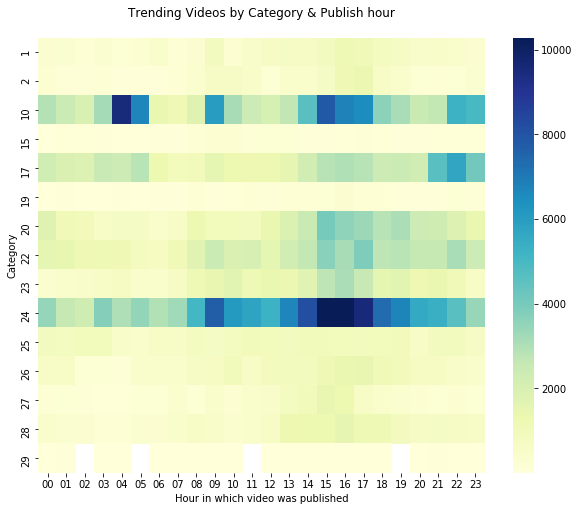

In [18]:
# video published by hour and category
# plot videos published by hour and category
videos_by_cat_pub_hour=trend_videos.groupby(["categoryId","publish_hour"]).count()["video_id"].unstack()

fig, ax = plt.subplots(figsize=(10,8))
vcph_plot = sns.heatmap(videos_by_cat_pub_hour, cmap="YlGnBu")
vcph_plot = ax.set(xlabel="Hour in which video was published", ylabel="Category")
plt.title("Trending Videos by Category & Publish hour\n")
plt.show()

We can then move into analyzing the relation of punctuation and writing style in each category to see if there are any correlations:

In [19]:
# does upper/lower case have an effect?
trend_videos['Uppercase']=trend_videos["title"].str.findall(r'[A-Z]').str.len()
trend_videos['Lowercase']=trend_videos["title"].str.findall(r'[a-z]').str.len()

trend_videos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publish_hour,Uppercase,Lowercase
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",22,37,0
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,15,14,4
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,14,11,11
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,15,6,33
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,20,5,29


In [21]:
# add in punctuation
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

trend_videos['count_punct'] = trend_videos.title.apply(lambda s: count(s, string.punctuation))
trend_videos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publish_hour,Uppercase,Lowercase,count_punct
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",22,37,0,2
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,15,14,4,1
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,14,11,11,1
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,15,6,33,2
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,20,5,29,5


In [23]:
category10_videos = trend_videos[["title","view_count"]].sort_values(by="view_count",ascending=False).drop_duplicates("title",keep="first")
category10_top10 = category10_videos.nlargest(10, ["view_count"])

trend_videos['Title_length']=trend_videos["title"].str.len()
trend_videos['Description_length']=trend_videos["description"].str.len()

trend_videos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,publish_hour,Uppercase,Lowercase,count_punct,Title_length,Description_length
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",22,37,0,2,46,926
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,15,14,4,1,25,301
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,...,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,14,11,11,1,29,334
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,...,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,15,6,33,2,48,550
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,...,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,20,5,29,5,52,1167


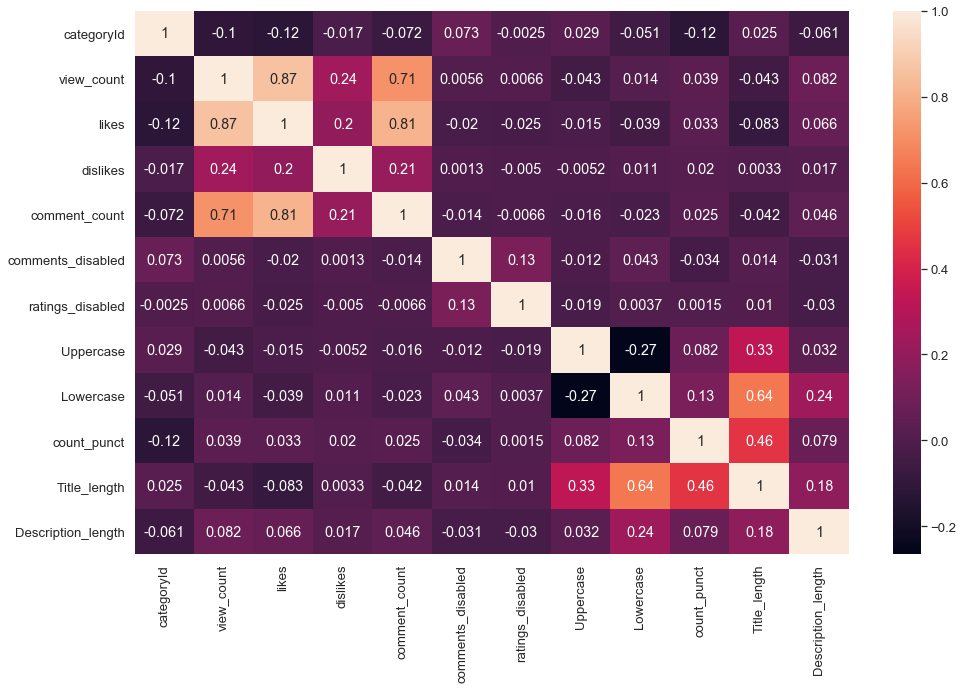

In [24]:
sns.set(font_scale=1.2)
figure = plt.subplots(figsize=(16,10))
corr_map = sns.heatmap(trend_videos.corr(), annot=True)

In [26]:
trend_videos["published_date_formatted"] = trend_videos["publishedAt"].apply(lambda x: x[0:10])
trend_videos.head()


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,publish_hour,Uppercase,Lowercase,count_punct,Title_length,Description_length,published_date_formatted
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",22,37,0,2,46,926,2020-08-11
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,15,14,4,1,25,301,2020-08-11
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,...,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,14,11,11,1,29,334,2020-08-10
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,...,False,False,Você se unirá aos Lunari e aos Solari em Targo...,15,6,33,2,48,550,2020-08-11
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,...,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,20,5,29,5,52,1167,2020-08-11


In [27]:
trend_videos["published_date_formatted"] = pd.to_datetime(trend_videos["published_date_formatted"])
trend_videos["day_of_week"] = trend_videos["published_date_formatted"].dt.dayofweek
trend_videos.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,publish_hour,Uppercase,Lowercase,count_punct,Title_length,Description_length,published_date_formatted,day_of_week
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,...,False,"Salve rapaziada, neste vídeo me declarei pra e...",22,37,0,2,46,926,2020-08-11,1
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,15,14,4,1,25,301,2020-08-11,1
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,...,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,14,11,11,1,29,334,2020-08-10,0
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,...,False,Você se unirá aos Lunari e aos Solari em Targo...,15,6,33,2,48,550,2020-08-11,1
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,...,False,Danilo Gentili recebe Thammy Miranda. Após pas...,20,5,29,5,52,1167,2020-08-11,1


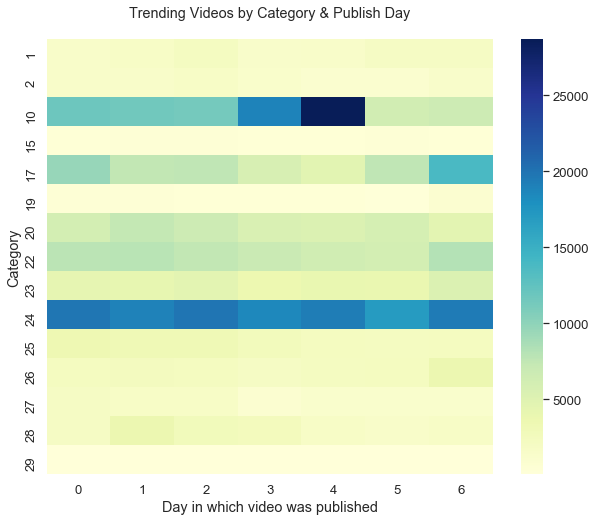

In [28]:
videos_by_cat_pub_date=trend_videos.groupby(["categoryId","day_of_week"]).count()["video_id"].unstack()

fig, ax = plt.subplots(figsize=(10,8))
vcph_plot = sns.heatmap(videos_by_cat_pub_date, cmap="YlGnBu")
vcph_plot = ax.set(xlabel="Day in which video was published", ylabel="Category")
plt.title("Trending Videos by Category & Publish Day\n")
plt.show()
# 0 is monday

Now that we have a feel for the dataset, we can move into analyzing for spikes in each category to see if there is a "ripple effect" in the category after a popular video has been published. We will begin by first looking to category 10, one of the most popular categories of the dataset. 

In [32]:
spike_df = trend_videos.loc[(trend_videos['categoryId']==10)]
spike_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,publish_hour,Uppercase,Lowercase,count_punct,Title_length,Description_length,published_date_formatted,day_of_week
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,...,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,15,14,4,1,25,301,2020-08-11,1
6,ly8jXKq_9AE,LIVE PLAYLIST DA TAY.,2020-08-12T03:31:08Z,UCg9nWuUISG69Hv2VaCrE72w,Tayara Andreza,10,2020-08-12T00:00:00Z,[None],93022,7595,...,False,#playlistdatay #tayaraandreza #taydeumjeitodif...,03,17,0,1,21,73,2020-08-12,2
11,OxwD-3E6M-k,"Kemilly Santos, Anderson Freire - Presença",2020-08-11T15:00:14Z,UCwS58BcJEKW5huj_ZXESBww,KemillySantosVEVO,10,2020-08-12T00:00:00Z,kemilly santos 2020|kemilly santos acustico|ke...,117085,15113,...,False,Vídeo Oficial de Presença da Kemilly Santos e ...,15,5,29,2,42,2242,2020-08-11,1
12,uD5dJXCa_1s,Isadora Pompeo e João Figueiredo - Máscaras,2020-08-11T13:00:09Z,UCkskLrHR3ga1AG_QS-trE6w,Musile Records,10,2020-08-12T00:00:00Z,6rupruh@dedu|Isadora pompeo|isadora|pompeo|joa...,175034,26722,...,False,#IsadoraPompeo #JoaoFigueiredo #Mascaras▸ Ouça...,13,5,29,1,43,2592,2020-08-11,1
21,2MfvRmLxNK8,Dreamcatcher(드림캐쳐) 'BOCA' MV Teaser #01,2020-08-12T09:00:01Z,UCijULR2sXLutCRBtW3_WEfA,Dreamcatcher official,10,2020-08-12T00:00:00Z,Dreamcatcher|드림캐쳐|드캐 컴백|드캐 티저|드캐 뮤비|드캐|Dreamca...,141679,38812,...,False,Dreamcatcher(드림캐쳐) 'BOCA' MV Teaser #012020.08...,09,8,16,5,39,689,2020-08-12,2


In [33]:
spike_df_sorted=spike_df.sort_values('published_date_formatted')
spike_df_sorted.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,description,publish_hour,Uppercase,Lowercase,count_punct,Title_length,Description_length,published_date_formatted,day_of_week
282040,-2RJTVPSOPc,DOCTOR (Official Video) Sidhu Moose Wala | Kid...,2020-08-03T02:30:09Z,UC9ChdqQRCaZmTCwSJ49tcbw,Sidhu Moose Wala,10,2020-08-12T00:00:00Z,doctor|sidhu|moose|wala|sidhu moose wala|docto...,23422631,1106267,...,False,Sidhu Moose Wala PresentsAlso available on: Sp...,02,20,53,6,97,1060,2020-08-03,0
334174,nlx-H5kxxkw,정동원 남승민&임도형 웰컴 투 하동 집들이 [아내의 맛],2020-08-05T02:43:53Z,UCrLQ0ovys23H9xBV6U-Sd4A,정동원TV,10,2020-08-13T00:00:00Z,[None],1892634,32204,...,False,Video has no description,02,0,0,3,31,24,2020-08-05,2
282217,jZQUM9T3SEQ,Asi Oh Hunne Aa (Official Video) Amrit Maan | ...,2020-08-05T04:30:19Z,UC2Z2M3HR-yAbUpAdyXEGBOQ,Bamb Beats,10,2020-08-13T00:00:00Z,amrit maan|amrit maan new song|asi oh hunne aa...,10988726,358716,...,False,Asi Oh Hunne Aa (Official Video) Amrit Maan | ...,04,15,58,5,100,597,2020-08-05,2
334018,nlx-H5kxxkw,정동원 남승민&임도형 웰컴 투 하동 집들이 [아내의 맛],2020-08-05T02:43:53Z,UCrLQ0ovys23H9xBV6U-Sd4A,정동원TV,10,2020-08-12T00:00:00Z,[None],1815842,31481,...,False,Video has no description,02,0,0,3,31,24,2020-08-05,2
281992,jZQUM9T3SEQ,Asi Oh Hunne Aa (Official Video) Amrit Maan | ...,2020-08-05T04:30:19Z,UC2Z2M3HR-yAbUpAdyXEGBOQ,Bamb Beats,10,2020-08-12T00:00:00Z,amrit maan|amrit maan new song|asi oh hunne aa...,10652699,354749,...,False,Asi Oh Hunne Aa (Official Video) Amrit Maan | ...,04,15,58,5,100,597,2020-08-05,2


In [34]:
spike_df_sorted['CumuMoveAvg'] = spike_df_sorted.view_count.expanding().mean()

In [36]:
spike_df_sorted.std() #current std deviation for views is 11364696.97

categoryId                  0.00
view_count           11293549.12
likes                  840184.06
dislikes                32609.37
comment_count          246856.92
comments_disabled           0.06
ratings_disabled            0.08
Uppercase                   8.11
Lowercase                  15.39
count_punct                 2.05
Title_length               21.70
Description_length       1039.84
day_of_week                 1.71
CumuMoveAvg            779558.41
dtype: float64

In [38]:
#how many standard deviations below or above the population mean a raw score is.
z = (stats.zscore(spike_df_sorted['view_count']))
print(z)

[ 1.71437906 -0.19202871  0.6133992  ... -0.31369996 -0.2825475
 -0.24842253]


In [39]:
# from: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
spikes = (np.where(z>3))
print(spikes) #gives the indices of values that have z>3

(array([   49,    56,    65, ..., 95231, 95235, 95238], dtype=int64),)


In [40]:
# for each outlier we want to get the left avg and the right avg for a 
# week on either side and then see if right is significantly larger than 
# left.
spikeResults=[]
spikes=spikes[0]
# print(spikes) #this is an array of the indices where there are spikes in data
for val in spikes:
    currentSpike=spike_df_sorted.iloc[val] #current spike val
    currentDate=currentSpike['published_date_formatted']

    freq = 'D'                                                     # 'H' for hours, etc.

    left_date=currentDate - pd.Timedelta(7, unit=freq)
    right_date=currentDate+pd.Timedelta(7, unit=freq)

    currentLeftData = spike_df_sorted[(spike_df_sorted["published_date_formatted"] >=left_date) & (spike_df_sorted["published_date_formatted"] <= currentDate)]
    leftAvg=currentLeftData["view_count"].mean()
    
    currentRightData = spike_df_sorted[(spike_df_sorted["published_date_formatted"] >=currentDate) & (spike_df_sorted["published_date_formatted"] <= right_date)]
    rightAvg=currentRightData["view_count"].mean()

    increasedViews=rightAvg>leftAvg
    
    spikeResults.append((leftAvg, rightAvg, increasedViews))

# print(spikeResults)
# print(len(spikeResults))
trueVal=0
falseVal=0

for val in spikeResults:
    if val[2]==True:
        trueVal+=1
    else:
        falseVal+=1

print("true count: ", trueVal)
print("false count: ", falseVal)

[(13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318, False), (13883168.524271844, 4288624.163738318,

In [41]:
categories_list=[1,2,10,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,41,42,43,44]
spike_results_byCat=[]
for cat in categories_list:
    spike_df = trend_videos.loc[(trend_videos['categoryId']==cat)]
    # temp_df = df_complete.ix[(df_complete['type'] == 'NDD')
    spike_df.head()
    spike_df_sorted=spike_df.sort_values('published_date_formatted')
    spike_df_sorted['CumuMoveAvg'] = spike_df_sorted.view_count.expanding().mean()
    spike_df_sorted.std()
    z = (stats.zscore(spike_df_sorted['view_count']))
    spikes = (np.where(z>3))
    spikeResults=[]
    spikes=spikes[0]
    # print(spikes) #this is an array of the indices where there are spikes in data
    for val in spikes:
        currentSpike=spike_df_sorted.iloc[val] #current spike val
        currentDate=currentSpike['published_date_formatted']

        freq = 'D'                                                     # 'H' for hours, etc.

        left_date=currentDate - pd.Timedelta(7, unit=freq)
        right_date=currentDate+pd.Timedelta(7, unit=freq)

        currentLeftData = spike_df_sorted[(spike_df_sorted["published_date_formatted"] >=left_date) & (spike_df_sorted["published_date_formatted"] <= currentDate)]
        leftAvg=currentLeftData["view_count"].mean()
        
        currentRightData = spike_df_sorted[(spike_df_sorted["published_date_formatted"] >=currentDate) & (spike_df_sorted["published_date_formatted"] <= right_date)]
        rightAvg=currentRightData["view_count"].mean()

        increasedViews=rightAvg>leftAvg
        
        spikeResults.append((leftAvg, rightAvg, increasedViews))

    trueVal=0
    falseVal=0

    for val in spikeResults:
        if val[2]==True:
            trueVal+=1
        else:
            falseVal+=1

    spike_results_byCat.append((cat, trueVal,falseVal))


In [42]:
print(spike_results_byCat)

[(1, 158, 127), (2, 41, 43), (10, 657, 702), (15, 21, 30), (17, 391, 617), (18, 0, 0), (19, 62, 7), (20, 349, 411), (21, 0, 0), (22, 350, 264), (23, 228, 295), (24, 1063, 989), (25, 157, 137), (26, 76, 30), (27, 118, 116), (28, 182, 170), (29, 4, 0), (30, 0, 0), (31, 0, 0), (32, 0, 0), (33, 0, 0), (34, 0, 0), (35, 0, 0), (36, 0, 0), (37, 0, 0), (38, 0, 0), (39, 0, 0), (40, 0, 0), (41, 0, 0), (41, 0, 0), (42, 0, 0), (43, 0, 0), (44, 0, 0)]


In [43]:
# plot category values for each spike -TODO (see an association between specific categoruies and viewership)
# attempt to change z score to 2 std deviations -TODO 
categoryIncrease=0
categoryDecrease=0
equalData=0
for val in spike_results_byCat:
    if val[1]>val[2]:
        categoryIncrease+=1
    elif val[1]==val[2]:
        equalData+=1
    else:
        categoryDecrease+=1
print((categoryIncrease, categoryDecrease, equalData))
#8 categories increased while 7 categories decreased. 

(9, 6, 18)
